<a href="https://colab.research.google.com/github/Aditya218-maker/Airbnbproject/blob/main/AIRbnbPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT_AIR BNB**

Project Type- EDA

Contribution- INDIVIDUAL

# **PROJECT SUMMMARY-**

->Airbnb is a global online marketplace that connects people looking to rent out their homes with those seeking short-term accommodations. Founded in 2008 in San Francisco, Airbnb has grown to become one of the most recognized brands in the travel and hospitality industry.

->At its core, Airbnb enables hosts to list properties—ranging from single rooms and apartments to villas and even unique spaces like treehouses or houseboats—on its platform. Guests can browse these listings, filter them by location, price, amenities, and more, and book directly through the Airbnb website or mobile app.

# PROBLEM STATEMENT

This project aims to analyze Airbnb listings in New York City to uncover patterns in: Pricing across different areas,Room type distribution,Listing availability,User engagement through reviews

By visualizing and interpreting this data, we seek to answer the question:
"What factors influence listing prices, availability, and user engagement in different parts of New York City?"



# **OBJECTIVE**

The objective of this project is to analyze Airbnb listings in New York City to uncover patterns and insights related to pricing, availability, room types, number of reviews, and location. By using Python libraries such as Pandas, NumPy, and Matplotlib, the goal is to understand how different factors influence listing popularity and price, and to visualize trends across various areas of the city.

# **KNOW YOUR DATA**

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Copy of Airbnb NYC 2019.csv')
df.head()

Saving Copy of Airbnb NYC 2019.csv to Copy of Airbnb NYC 2019.csv


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **DATASET INFORMATION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# **DATASET ROWS AND COLUMNS COUNTS**

In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 48895
Number of columns: 16


**bold text**# DATA WRANGLING

In [ ]:
df.drop_duplicates(inplace=True)
df = df[df['price'] < 500]

## **DATA** **VISUALIZATION**

# FIRST CHART

Text(0.5, 1.0, 'Price vs Number of Reviews')

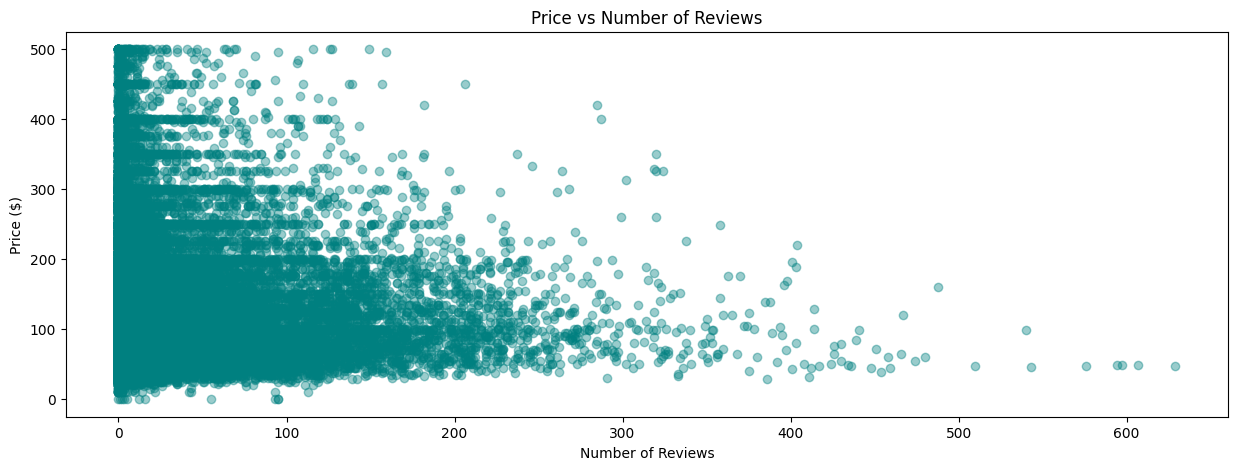

In [ ]:
#PRICE vs NUMBER OF REVIEWS: SCATTER PLOT
plt.figure(figsize=(15, 5))
# Plot 1: Price vs Number of Reviews
plt.scatter(df['number_of_reviews'], df['price'], alpha=0.4, color='teal')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.title('Price vs Number of Reviews')

# **OBSERVATIONS

->Rentals with lower prices tend to have more reviews.

->Higher-priced rentals generally get fewer reviews.This suggests that affordable accomodations are more popular or frequently booked.

->There is a high concentration of points in the lower-left part of the graph (price < $200 and reviews < 100). This indicates that most rentals are affordable and have a moderate number of reviews.

->KEY insight: As the price increases, the number of reviews tends to decrease. This may reflect customer preferences for value-for-money accommodations.

# SECOND CHART

<Figure size 1500x600 with 0 Axes>

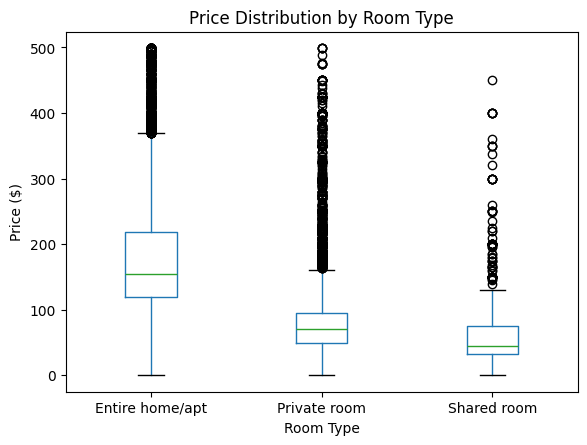

In [ ]:
# Filter to remove extremely high prices for cleaner plot
df = df[df['price'] < 500]
# Plot: Box plot of price by room type
plt.figure(figsize=(15,6))
df.boxplot(column='price', by='room_type', grid=False)
plt.title('Price Distribution by Room Type')
plt.suptitle('')  # Remove automatic super title
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

# **OBSERVATIONS

->here i've compared three types of room are: 1.Entire home/apt, 2.Private room 3.Shared room

->Entire home/apt has the highest price range, with a median around 150-175 dollars and many rentals going well above 400 dollars.

->Private rooms are moderately priced, with most prices below 150 dollars, and a median around 75 dollars.

->Shared rooms are the cheapest option, with most prices under 100 dollars, and a median closer to 50 dollars.

->Entire home/apt has the widest range and most variability in pricing.

->Shared rooms show the least variability and are priced lower.


# THIRD CHART

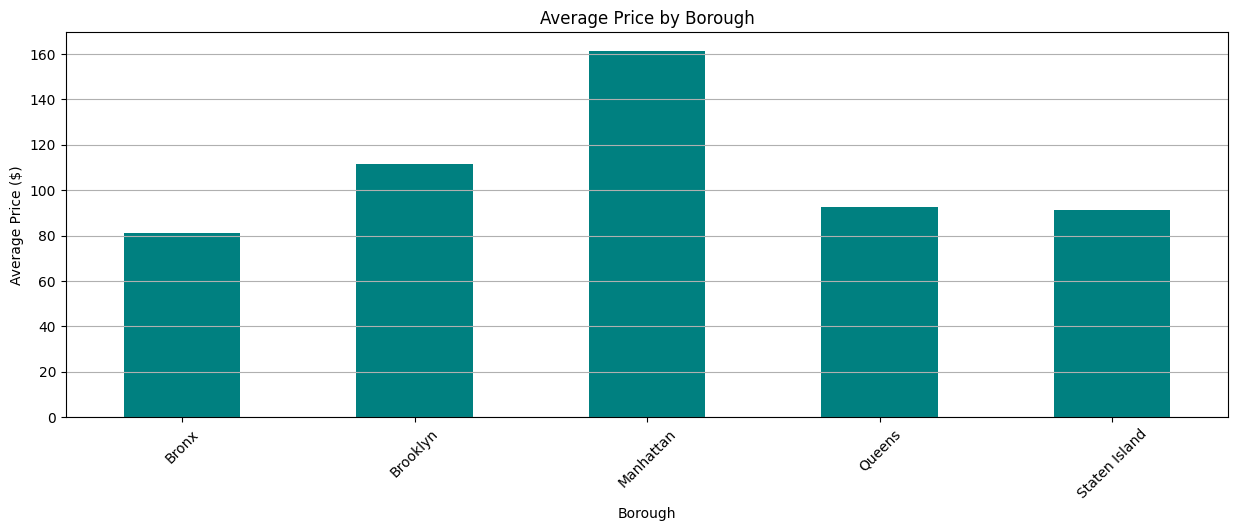

In [ ]:
# Group and compute average price by borough
avg_price_by_borough = df.groupby('neighbourhood_group')['price'].mean()
# Plot bar chart
plt.figure(figsize=(15, 5))
avg_price_by_borough.plot(kind='bar', color='teal')
plt.title('Average Price by Borough')
plt.ylabel('Average Price ($)')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=1.0)
plt.show()


# **OBSERVATION:

->Manhattan has the highest average price, well above $160 due to its central location, tourist attractions, and premium real estate.

->Brooklyn follows with an average price around $110, making it a popular alternative to Manhattan.

->Queens, Staten Island, and Bronx all hover around $90 or lower.These part of the city offer more budget-friendly options for travellers.

->The chart clearly shows that location of the area significantly affects average Airbnb pricing. Manhattan properties are priced highest, while outer regions offer more economical options, likely appealing to budget-conscious guests.

# FOURTH CHART

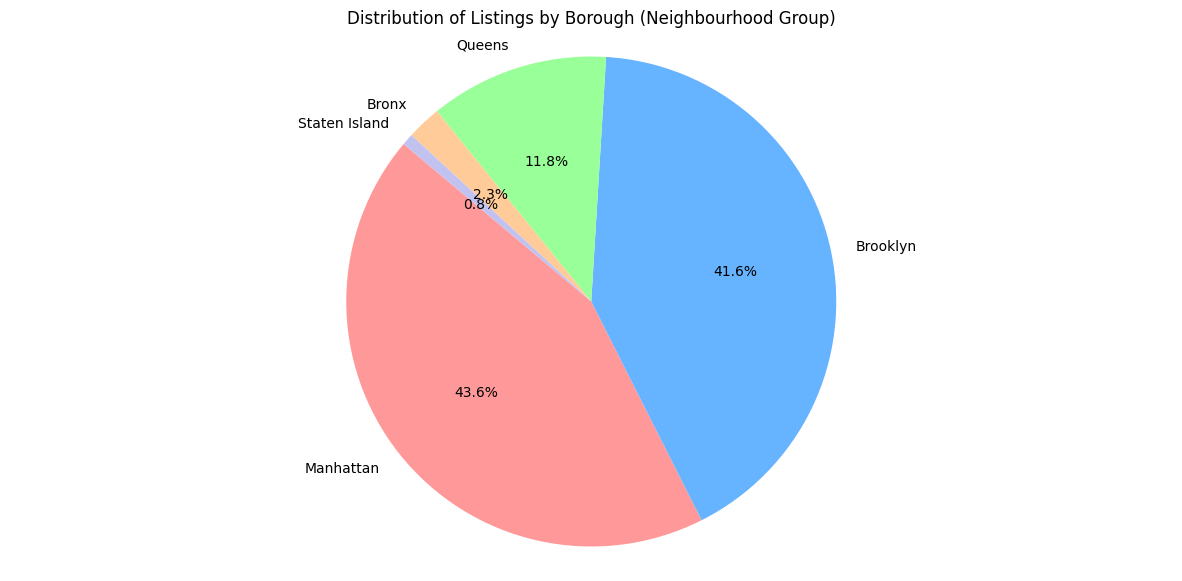

In [ ]:
# Count the number of listings per borough (neighbourhood_group)
borough_counts = df['neighbourhood_group'].value_counts()

# Create the pie chart
plt.figure(figsize=(15, 7))
plt.pie(borough_counts, labels=borough_counts.index, autopct='%1.1f%%',
        startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Distribution of Listings by Borough (Neighbourhood Group)')
plt.axis('equal')  # Ensures the pie is a perfect circle
plt.show()

# **OBSERVATIONS

->Manhattan holds the largest share of Airbnb rentals with 43.6% followed by Brooklyn with 41.6%.

->Queens contributes 11.8% of rentals.It likely caters to travellers looking for more affordable stays near airports (like JFK or LaGuardia).

->Bronx contributes only 2.3% and Staten Island with just 0.8%. These region are less represented in the short-term rental market, possibly due to lower tourist demand or stricter hosting regulations.

# FIFTH CHART

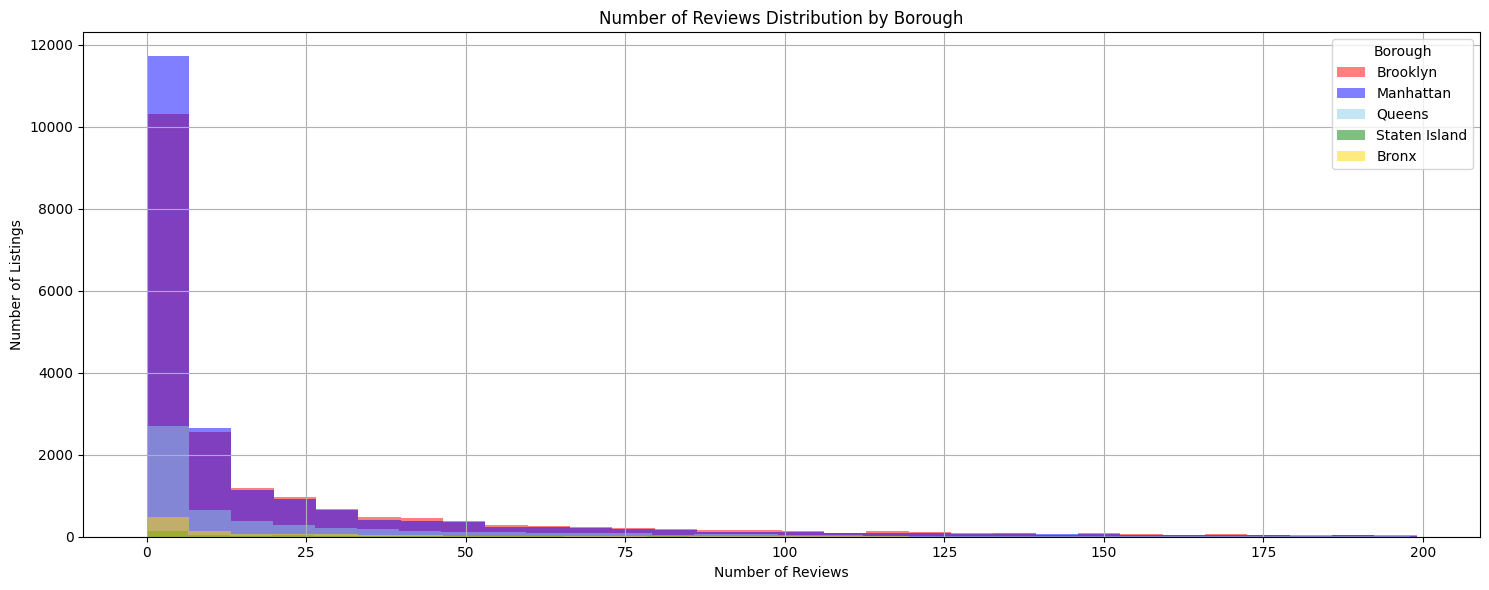

In [ ]:
# Filter to reduce noise and remove extreme review counts
df = df[df['number_of_reviews'] < 200]
# Define boroughs and colors
boroughs = df['neighbourhood_group'].unique()
colors = ['red', 'blue', 'skyblue', 'green', 'gold']
# Plot overlapping histograms of number_of_reviews for each borough
plt.figure(figsize=(15, 6))
for borough, color in zip(boroughs, colors):
    subset = df[df['neighbourhood_group'] == borough]
    plt.hist(subset['number_of_reviews'], bins=30, alpha=0.5, label=borough, color=color)
plt.title('Number of Reviews Distribution by Borough')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.legend(title='Borough')
plt.grid(True)
plt.tight_layout()
plt.show()


# **OBSERVATIONS

->The vast majority of rentals in all regions have a low number of reviews, mostly between 0–20. The frequency drops sharply as the number of reviews increases.

->The tallest bars (0–10 reviews) are mostly blue and red, representing Manhattan and Brooklyn, which have the highest number of accomodations overall. These regions show a consistent presence even at higher review counts.

->While most rentals receive fewer than 20 reviews, some extend up to 200 reviews, though these are rare. These long-tailed accomodations may indicate well-established or highly rated hosts.

->Key insight: Most Airbnb listings in NYC receive only a small number of reviews, especially in less popular region. Manhattan and Brooklyn not only dominate in listing volume, but also in listings that receive more consistent guest engagement over time.


# SIXTH **CHART**

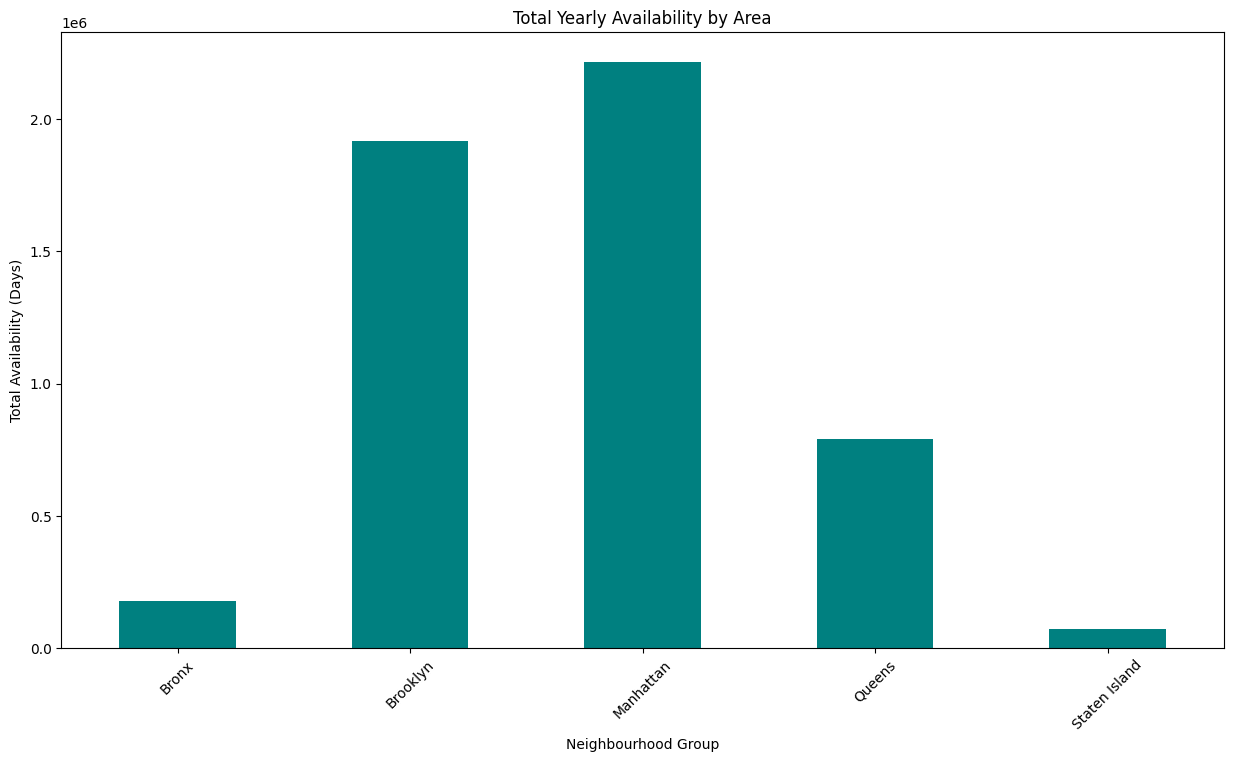

In [ ]:
availability_by_area = df.groupby('neighbourhood_group')['availability_365'].sum()
plt.figure(figsize=(15, 8))
availability_by_area.plot(kind='bar', color='teal')
plt.title('Total Yearly Availability by Area')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Availability (Days)')
plt.xticks(rotation=45)
plt.show()

# **OBSERVATIONS**

Manhattan has the highest total availability, followed by Brooklyn, indicating they dominate Airbnb activity.

Queens comes third but significantly lower.

Staten Island and Bronx have the least availability, suggesting fewer active or full-time listings in those areas.

# **SEVENTH CHART**

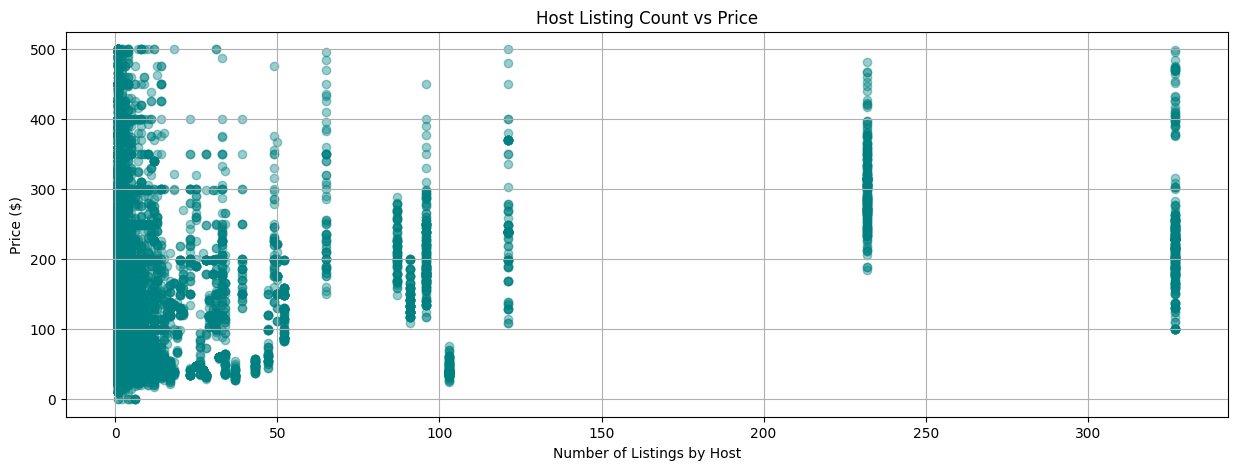

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(df['calculated_host_listings_count'], df['price'], alpha=0.4, color='teal')
plt.title('Host Listing Count vs Price')
plt.xlabel('Number of Listings by Host')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# **EIGHTH CHART**

# **OBSERVATIONS**

Most hosts have fewer listings (0–50) and fall across all price ranges.

A few hosts have a large number of listings (100+), and they tend to price their listings more consistently, often between $100–$500.

There’s no strong correlation between the number of listings and the price — having more listings doesn’t necessarily mean higher or lower prices.

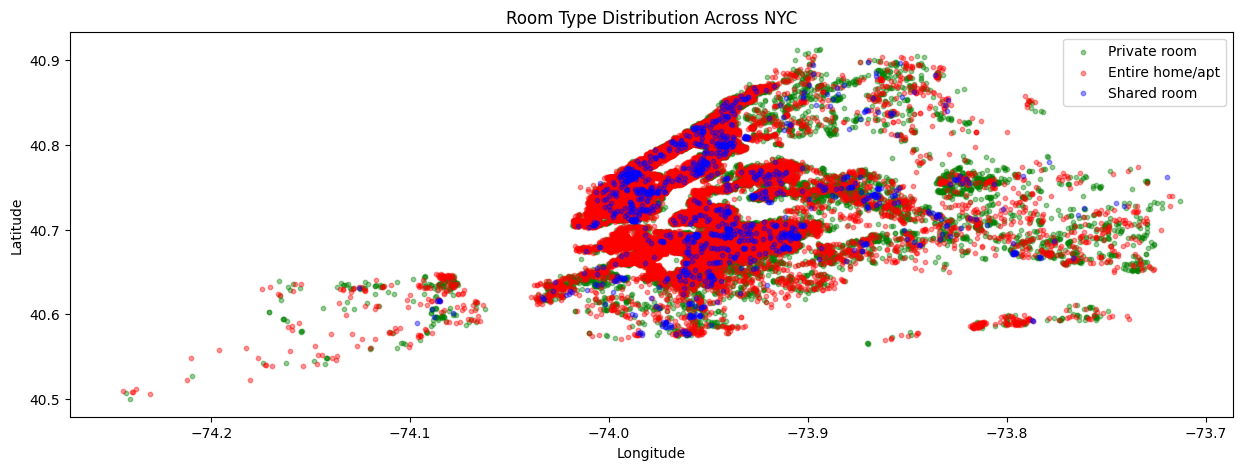

In [ ]:
plt.figure(figsize=(15, 5))
colors = {'Entire home/apt':'red', 'Private room':'green', 'Shared room':'blue'}

for room_type in df['room_type'].unique():
    subset = df[df['room_type'] == room_type]
    plt.scatter(subset['longitude'], subset['latitude'],
                alpha=0.4, label=room_type, s=10, color=colors[room_type])

plt.title('Room Type Distribution Across NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


# **NINTH CHART**

# **OBSERVATIONS**

Entire home/apt listings (red dots) are heavily concentrated in central NYC, especially in Manhattan and Brooklyn.

Private rooms (green dots) are evenly spread across all boroughs, suggesting broader accessibility and affordability.

Shared rooms (blue dots) are less frequent and mostly found in central or high-density areas.

Manhattan appears to have a high density of all room types, making it a hotspot for Airbnb activity.

Outer boroughs like Staten Island and far parts of Queens have fewer listings overall, with private rooms being more common there.

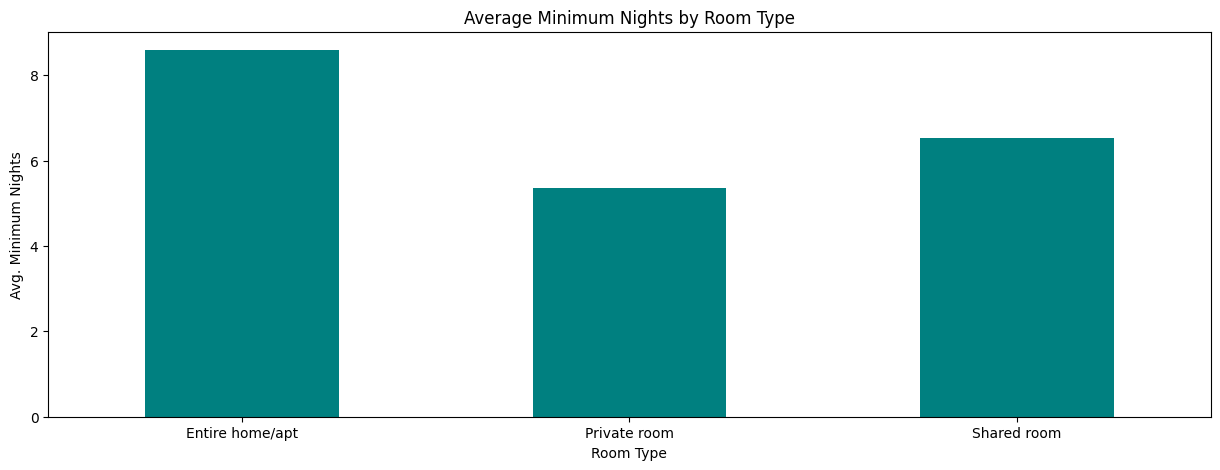

In [ ]:
avg_min_nights = df.groupby('room_type')['minimum_nights'].mean()
plt.figure(figsize=(15, 5))
avg_min_nights.plot(kind='bar', color='teal')
plt.title('Average Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Avg. Minimum Nights')
plt.xticks(rotation=0)
plt.show()

# OBSERVATIONS:**bold text**

Entire home/apt listings have the highest average minimum nights, around 9 nights.

Private rooms have the lowest average, with approximately 5 nights.

Shared rooms fall in between, averaging around 6.5 nights.

This suggests that guests booking entire homes tend to stay longer compared to those booking private or shared rooms.

The data might reflect longer-term stays or vacation planning for entire homes, while private and shared rooms may attract shorter or budget stays.



TENTH CHART


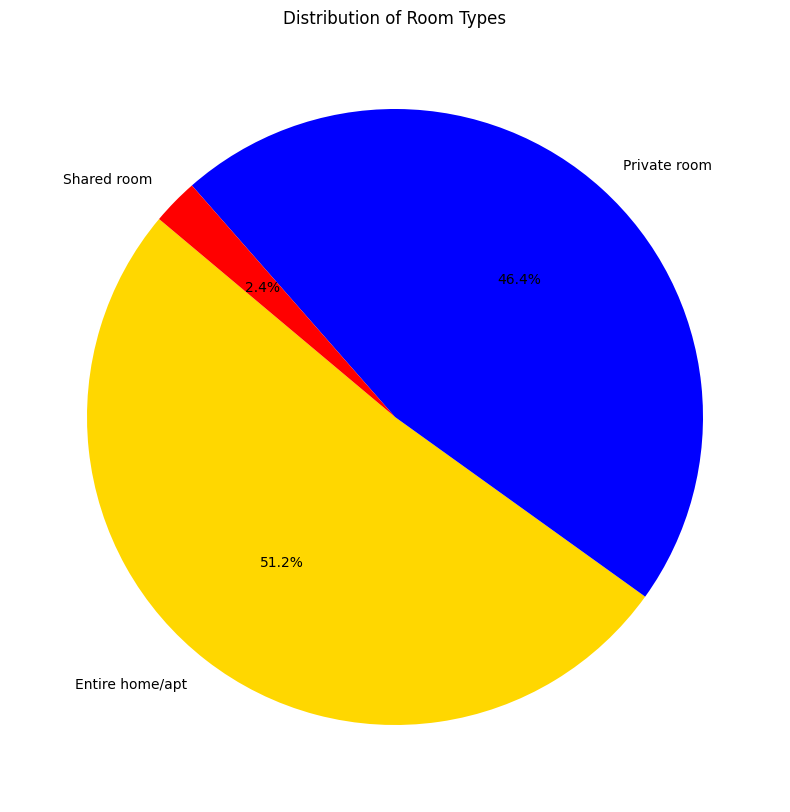

In [ ]:
room_counts = df['room_type'].value_counts()
plt.figure(figsize=(10, 10))
room_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold','blue','red'])
plt.title('Distribution of Room Types')
plt.ylabel('')  # Hide y-label
plt.show()


## OBSERVATIONS

Entire home/apt listings make up the largest proportion, accounting for 51.2% of the total.

Private room listings are the second most common, comprising 46.4% of the data.

Shared room listings are the least common, making up only 2.4% of the total.

The chart shows a strong preference for entire home/apt and private room listings, while shared rooms are a niche offering.

# **CONCLUSION**
In conclusion, this project helped me explore how factors like location, room type, and price affect Airbnb rentals in New York City. I found that affordable properties, especially in Brooklyn and Manhattan, tend to get more reviews and bookings.

Overall, this analysis gave me valuable insights into real-world data and helped me practice data wrangling, visualization, and interpretation using Python.


Through this analysis, we gained valuable insights into the Airbnb landscape of New York City. We observed that Manhattan and Brooklyn dominate in both availability and number of listings, though Manhattan has the highest average price, reflecting its premium location. Entire homes/apartments are the most common room type, especially in central areas, while private and shared rooms are more dispersed in outer boroughs like Queens and Bronx.

There is no strong correlation between price and number of reviews, suggesting that higher prices do not necessarily mean more popularity or better service. Additionally, areas with higher listing volumes also tend to show more activity and availability, hinting at tourist preferences and market demand.

Overall, this project highlights how location, room type, and price interact to shape the Airbnb market — helping travelers make informed choices and hosts better understand market trends.

